# <center>Machine Learning Project</center>

** **
## <center>*01 - Exploratory Data Analysis & Preprocessing*</center>

** **

The members of the `team` are:
- Ana Farinha - 20211514
- Francisco Capontes - 20211692
- Maria Cruz - 20230760
- Sofia Gomes - 20240848
- Tahiya Laboni - 20240943


## <span style="color:salmon"> Description of the project  </span> 

The New York Workers’ Compensation Board (WCB) administers and regulates workers’ compensation, disability, volunteer firefighters, volunteer ambulance workers, and volunteer civil defence workers’ benefits. As the regulating authority, the WCB is responsible for assembling and deciding on claims whenever it becomes aware of a workplace injury. Since 2000, the WCB has assembled and reviewed more than 5 million claims.

However, manually reviewing all claims is an arduous and time-consuming process. For that reason, the WCB has reached out to Nova IMS to assist them in the creation of a model that can automate the decision-making whenever a new claim is received.

## <span style="color:salmon"> Table of Contents </span>

1. [Importing Libraries & Data](#1.-importing-libraries--data) <br><br>  

2. [Exploratory Data Analysis](#2.-explore-data-analysis) <br>  
   2.1 [Initial Exploration](#2.1-initial-exploration) <br>  
   2.2 [Duplicates](#2.2-duplicates) <br>  
   2.3 [Missing Values](#2.3-missing-values) <br>  
   2.4 [Target Distribution](#2.4-target-distribution) <br>  
   2.5 [Numerical Variables](#2.5-numerical-variables) <br>  
   2.6 [Categorical Variables](#2.6-categorical-variables) <br>  
   2.7 [Date Variables](#2.7-date-variables) <br><br>  

3. [Clean and Pre-processing](#3.-clean-and-pre-processing) <br>  
   3.1 [Data Types](#3.1-data-types) <br>  
   3.2 [Incoherencies](#3.2-incoherencies) <br>  
   3.3 [Handling Missing Values](#3.3-handling-missing-values) <br>  
   3.4 [Removing Outliers](#3.4-removing-outliers) <br>  
   3.5 [Numerical Variables](#3.5.1-numerical-variables) <br>  
   3.6 [Categorical Variables](#3.5.2-categorical-variables) <br><br>  

4. [Other Visualizations](#4.-other-visualizations) <br> <br> 

5. [Feature Selection](#5.-feature-selection) <br><br>  

6. [Export Dataset](#6.-export-dataset) <br><br>  



## <span style="color:salmon"> 1. Import Libraries & Data  </span> 

In [32]:
import pandas as pd
import numpy as np
from scipy import stats

# Missing Values
import missingno as msno

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

from utils import *

In [33]:
df = pd.read_csv('./project_data/train_data.csv')
df

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_16792\1657859846.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./project_data/train_data.csv')


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593466,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593467,2022-12-13,72.0,N,2022-12-31,N,0.00,1950.0,2022-12-31,NaN,TECHNOLOGY INSURANCE CO. INC.,...,25.0,FROM DIFFERENT LEVEL (ELEVATION),90.0,MULTIPLE PHYSICAL INJURIES ONLY,-9.0,MULTIPLE,12779,0.0,Not Work Related,3.0
593468,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593469,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## <span style="color:salmon"> 2. Exploratory Data Analysis  </span> 

#### <span style="color:salmon"> 2.1 Initial Exploration </span> 

In order the understand better the dataset, we can use some function, like:

1. See the first ten lines 

In [34]:
df.head(10)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0
5,2019-12-26,67.0,N,2020-01-01,N,0.00,1952.0,2019-12-31,NaN,INDEMNITY INS. OF N AMERICA,...,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,38.0,SHOULDER(S),11772,0.0,Not Work Related,5.0
6,2019-12-28,48.0,N,2020-01-01,N,0.00,1971.0,2019-12-31,NaN,LM INSURANCE CORP,...,19.0,"CUT, PUNCTURE, SCRAPE, NOC",40.0,LACERATION,36.0,FINGER(S),13029,0.0,Not Work Related,1.0
7,2019-12-30,33.0,N,2020-01-01,N,0.00,1986.0,2019-12-31,2020-03-04,STATE INSURANCE FUND,...,99.0,"OTHER - MISCELLANEOUS, NOC",71.0,"ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC",38.0,SHOULDER(S),10305,0.0,Not Work Related,6.0
8,2019-12-23,55.0,N,2020-01-01,N,0.00,1964.0,2020-01-01,NaN,"ROCHESTER, UNIVERSITY OF",...,99.0,"OTHER - MISCELLANEOUS, NOC",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",60.0,LUNGS,14620,0.0,Not Work Related,6.0
9,2019-12-29,20.0,N,2020-01-01,N,225.00,NaN,2019-12-31,NaN,LM INSURANCE CORP,...,81.0,"STRUCK OR INJURED, NOC",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",14.0,EYE(S),11231,0.0,Not Work Related,6.0


2. To get information about the dta types un each column, non-null values and memory usage:

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

3. Getthe shape of the dataset:

In [36]:
df.shape

(593471, 33)

#### <span style="color:salmon"> 2.2 Duplicates </span> 

Thi section is divided into two main parts: checking for duplicated `Claim Indentifier` and searching for duplicated rows.

1.  Checking for duplicated IDs

This dataset contains a variable called `Claim Identifier` which should be unique to each injuty claim / row. 

In [37]:
# Search for duplicated 'Claim Identifier'
df['Claim Identifier'].duplicated().sum()

np.int64(1)

Above, it can be verified the existence of wo rows with the sam `Claim Identifier`. To better understand why that happened, below the rows with the same id can be seen.

In [38]:
# Check for duplicated values in 'Claim Identifier'
duplicated_claims = df['Claim Identifier'].duplicated(keep=False)

df[duplicated_claims]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
257901,NaN,NaN,NaN,2021-05-21,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
526445,NaN,NaN,NaN,2022-09-05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The rows are almost empty so we decided to drop these two. Afterwards, the possibility of existing similar rows almost empty will be explored.

In [39]:
df.drop_duplicates(subset='Claim Identifier', keep='first', inplace=True)

In [40]:
df = df.set_index('Claim Identifier')

After dropping the repeated `Claim Identifier`, the variable was used as index.

2. Search for duplicated rows

In [41]:
print(f'There are {df.duplicated().sum()} duplicated rows, which represents {(18349/len(df) * 100):.1f}% of the dataset')


KeyboardInterrupt: 

Before deciding what to do with these duplicated rows, lets explore them a bit.

In [11]:
df[df.duplicated(keep=False)].describe()

,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count,Industry Code,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents
count,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
mean,0.0,0.0,1968.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
std,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
min,0.0,0.0,1968.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
25%,0.0,0.0,1968.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
50%,0.0,0.0,1968.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
75%,0.0,0.0,1968.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
max,0.0,0.0,1968.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


Above, the descriptive statistics of the duplicated rows. We can see that the columns have missing values or have constant values. Because they do not add information, we decided to remove them.

In [12]:
df = df.drop_duplicates(keep=False)

#### <span style="color:salmon"> 2.3 Missing Values </span> 

Using the method `.info()`, it was already verified that several variables have missing values. One that sood out was the target variable `Claim Injury Type`.

In [13]:
df[df['Claim Injury Type'].isna()].isna().sum()

Accident Date                         0
Age at Injury                         0
Alternative Dispute Resolution        0
Assembly Date                         0
Attorney/Representative               0
Average Weekly Wage                   0
Birth Year                            0
C-2 Date                              0
C-3 Date                              0
Carrier Name                          0
Carrier Type                          0
Claim Injury Type                     0
County of Injury                      0
COVID-19 Indicator                    0
District Name                         0
First Hearing Date                    0
Gender                                0
IME-4 Count                           0
Industry Code                         0
Industry Code Description             0
Medical Fee Region                    0
OIICS Nature of Injury Description    0
WCIO Cause of Injury Code             0
WCIO Cause of Injury Description      0
WCIO Nature of Injury Code            0


Above, it can be checked that the majority of the missing values all belong to the same rows which have no target. As such, it was decided to remove those rows to facilitate the exploration of the remaining missing values.

In [14]:
# Remove rows with no target
df.dropna(subset=['Claim Injury Type'], inplace = True)

The next step, was to explore the remaining missing values.

In [15]:
# Calculate the percentage of null values per column
# Mean calculates the propotion
null_percentage = df.isnull().mean() * 100

# Convert the result to a DataFrame for better readability
null_percentage_df = null_percentage.reset_index()
null_percentage_df.columns = ['Column', 'Null Percentage']

null_percentage_df # Before making decisions, check which variables can have na following the project description

,Column,Null Percentage
0,Accident Date,0.642308
1,Age at Injury,0.000000
2,Alternative Dispute Resolution,0.000000
3,Assembly Date,0.000000
4,Attorney/Representative,0.000000
5,Average Weekly Wage,4.991255
6,Birth Year,5.065642
7,C-2 Date,2.536131
8,C-3 Date,67.380632
9,Carrier Name,0.000000


#### <span style="color:yellow"> Conclusions </span> 

Make conclusions about the above and decide which columns should be removed.

In [16]:
# Suggestions
# df = df[df[['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution']].any(axis=1)]
# df = df.drop(columns=['OIICS Nature of Injury Description'])

**Heatmap of Missing Values**

The heatmap shows correlations between missing values in different columns, revealing if missingness in one column is associated with missingness in another.

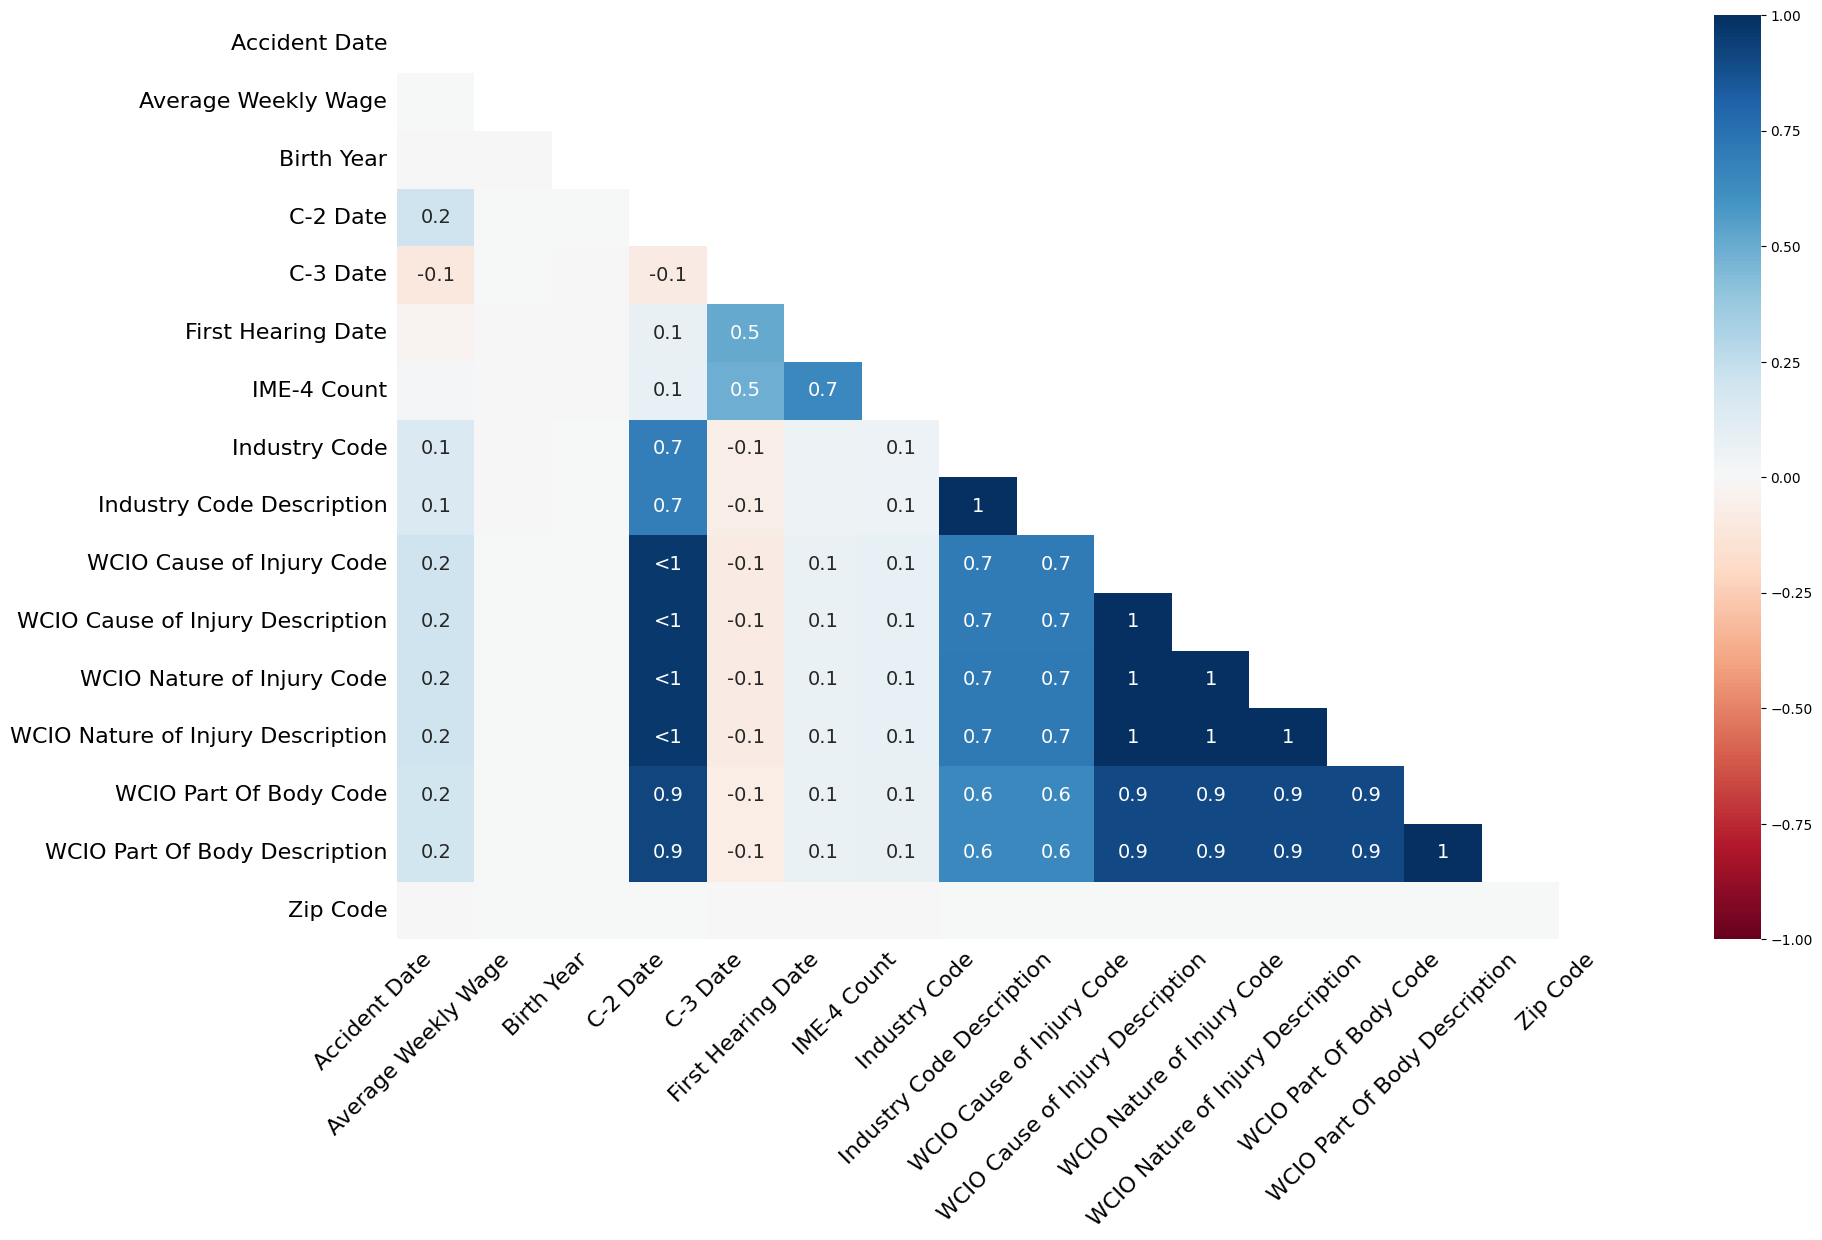

In [17]:
msno.heatmap(df)
plt.show()


#### <span style="color:yellow"> Conclusions </span> 

**Dendogram of Missing Values**

The dendrogram groups columns with similar patterns of missing values. It’s useful for identifying clusters of columns that have related missing data patterns, which might be caused by specific conditions or categories.

<Figure size 1200x800 with 0 Axes>

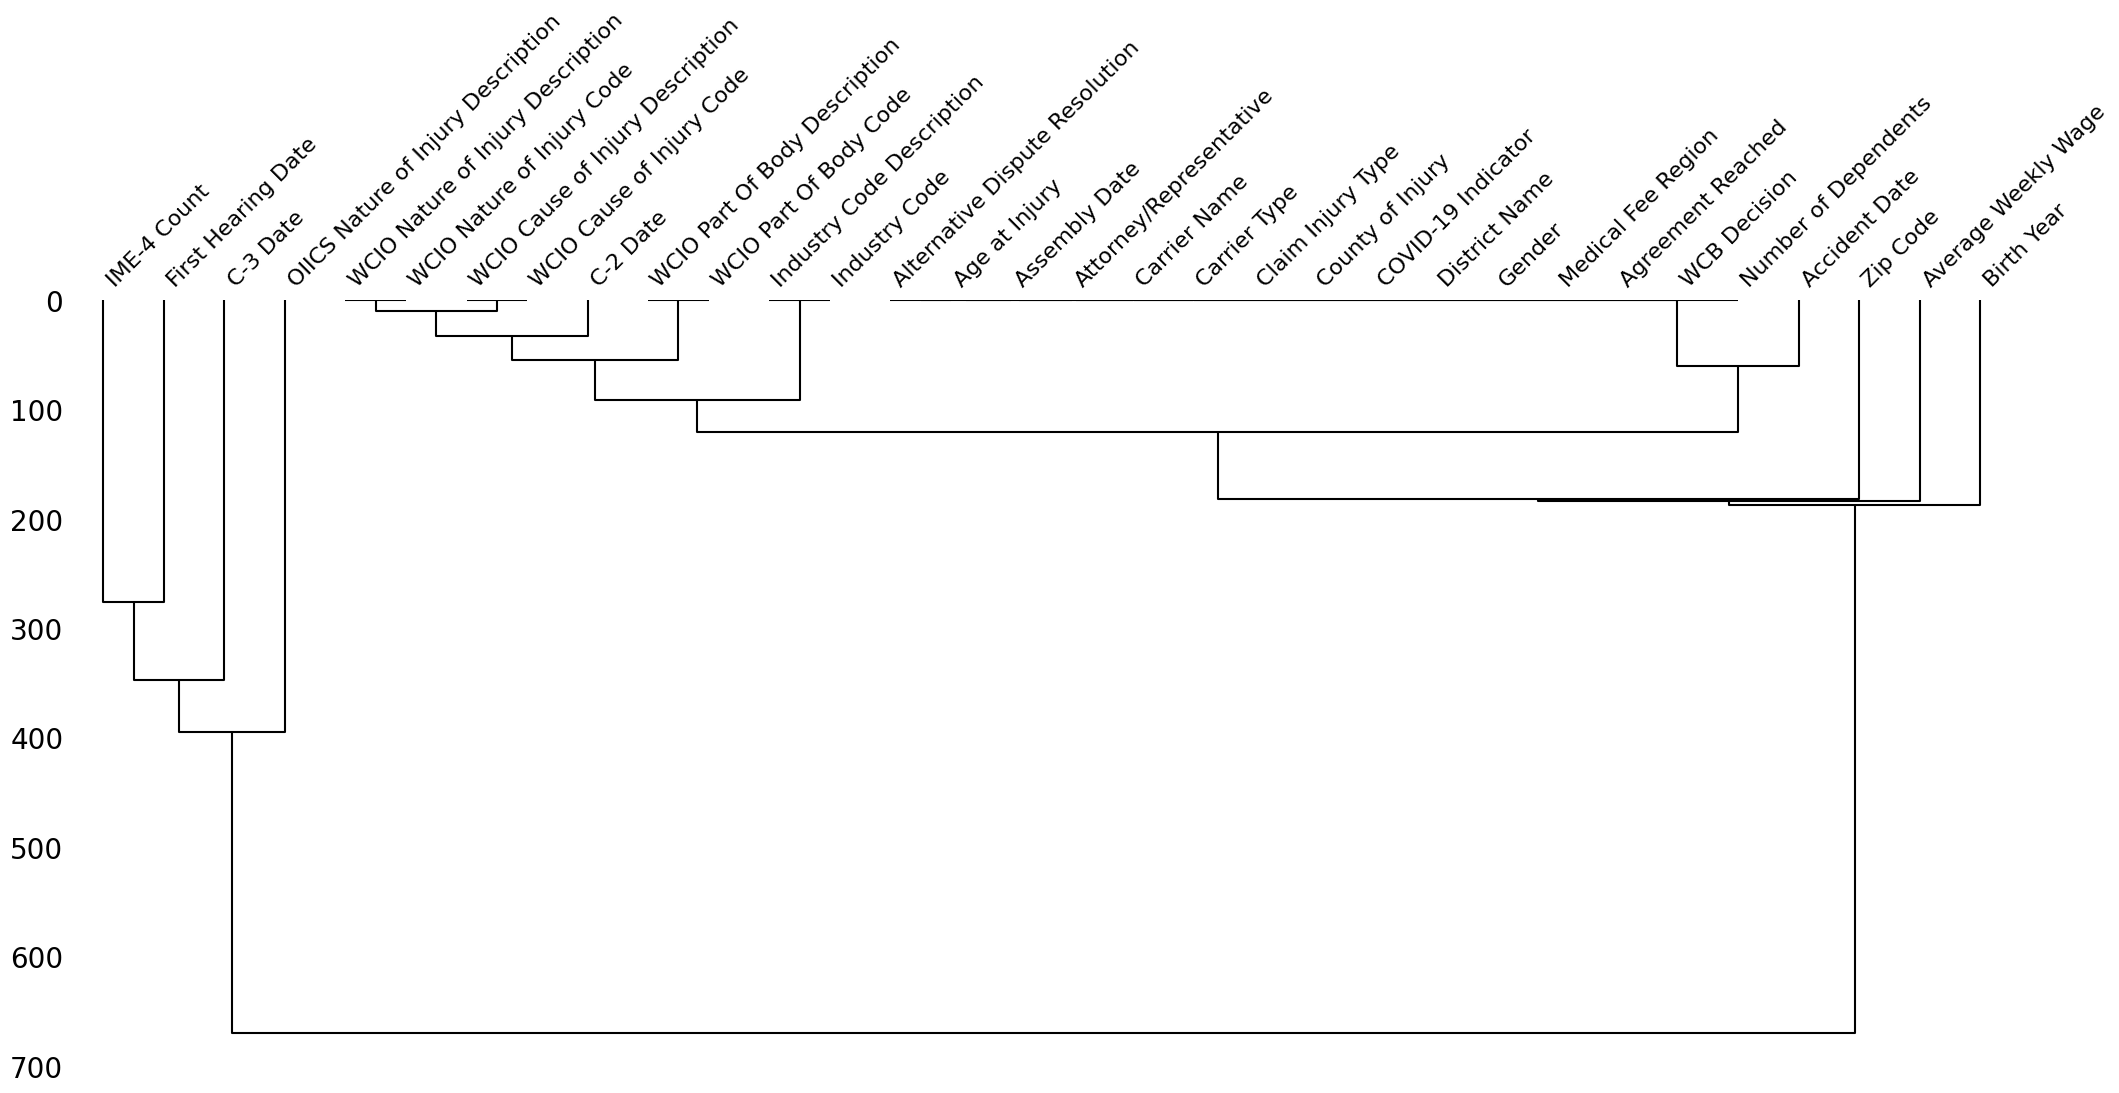

In [18]:
plt.figure(figsize=(12, 8))
msno.dendrogram(df)
plt.show()


#### <span style="color:yellow"> Conclusions </span> 

#### <span style="color:salmon"> 2.4 Target Distribution </span> 

to get to know our data, we started by exploring the target variable `Claim Injury Type`. To do so, we created a freaquency bar chart.

<Axes: title={'center': 'Frequency of Claim Injury Type'}, xlabel='Claim Injury Type', ylabel='count'>

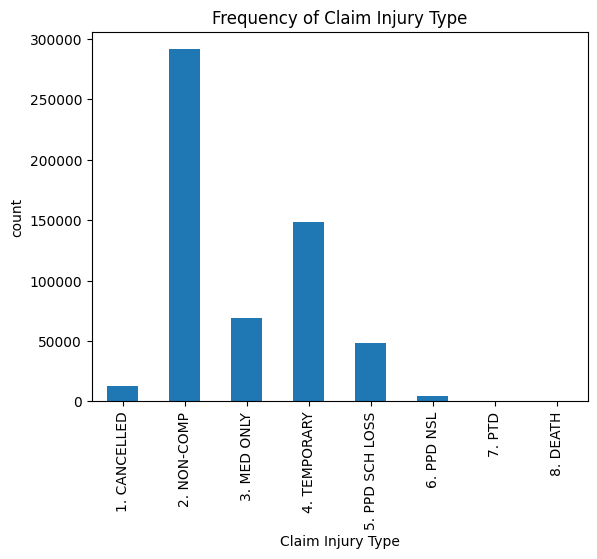

In [19]:
# Using value_counts to get counts per state and plotting
df['Claim Injury Type'].value_counts().sort_index().plot(kind='bar', xlabel='Claim Injury Type', ylabel='count', title='Frequency of Claim Injury Type')


#### <span style="color:yellow"> Conclusions </span> 

Refre its an unbanlanced dataset

#### <span style="color:salmon"> 2.5 Numerical Variables </span> 

Numerical variables represent measurable quantities and can be analyzed mathematically. <br>  
The numerical variables that exist in this dataset are:

In [20]:
numerical_features = [
    'Age at Injury', 'Average Weekly Wage', 'Birth Year', 'IME-4 Count', 'Number of Dependents'
]

In [21]:
numerical_df = df[numerical_features]
numerical_df

,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count
Claim Identifier,,,,
5393875,31.0,0.00,1988.0,NaN
5393091,46.0,1745.93,1973.0,4.0
5393889,40.0,1434.80,1979.0,NaN
5393887,61.0,NaN,1958.0,NaN
5393863,67.0,0.00,1952.0,NaN
...,...,...,...,...
6165265,35.0,0.00,1987.0,NaN
6165285,33.0,0.00,1989.0,NaN
6165506,61.0,991.08,1961.0,1.0


Show some statistics about the numerical_df:

In [13]:
numerical_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,574026.0,42.114270,14.256432,0.0,31.0,42.0,54.0,117.0
Average Weekly Wage,545375.0,491.088321,6092.918120,0.0,0.0,0.0,841.0,2828079.0
Birth Year,544948.0,1886.767604,414.644423,0.0,1965.0,1977.0,1989.0,2018.0
IME-4 Count,132803.0,3.207337,2.832303,1.0,1.0,2.0,4.0,73.0
Industry Code,564068.0,58.645305,19.644175,11.0,45.0,61.0,71.0,92.0
OIICS Nature of Injury Description,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WCIO Cause of Injury Code,558386.0,54.381143,25.874281,1.0,31.0,56.0,75.0,99.0
WCIO Nature of Injury Code,558369.0,41.013839,22.207521,1.0,16.0,49.0,52.0,91.0
WCIO Part Of Body Code,556944.0,39.738146,22.365940,-9.0,33.0,38.0,53.0,99.0
Agreement Reached,574026.0,0.046665,0.210921,0.0,0.0,0.0,0.0,1.0


«
### <span style="color:yellow"> ACABAR </span> 

- **Age at Injury**: 
    - Mean age is 42.11 years with a standard deviation of 14.26
    - The ages range from 0 to 117 years, with the 25th percentile at 31, the median at 42, and the 75th percentile at 54
    - 75% of the people has 54 age at injury
- **Average Weekly Wage**: 
    - Mean weekly wage is 491.09 with a very high standard deviation of 6092.92
    - The wages range from 0 to a maximum of 2,828,079
    - 75% have an average weekly wage of 841
- **Birth Year**: 
    - The mean birth year is around 1886.77 with a standard deviation of 414.64
- **IME-4 Count**: 
    - Mean count is 3.21 with a standard deviation of 2.83
- **Number of Dependents**: 
    - something



#### <span style="color:yellow"> Put visualizations of numeric features </span> 
Assess numerical feature distributions, detect skewness, and identify potential outliers.

#### <span style="color:salmon"> 2.6 Categorical Variables </span> 

Categorical variables represent characteristics or qualities that group data into distinct categories or labels. <br>  
In this dataset, the categorical variables are:

In [28]:
categorical_features = [
    'Alternative Dispute Resolution', 'Attorney/Representative',
    'Carrier Name',  'Carrier Type', 'County of Injury',
    'COVID-19 Indicator',  'District Name', 'Gender', 'Industry Code',
    'Industry Code Description',  'Medical Fee Region',
    'OIICS Nature of Injury Description',  'WCIO Cause of Injury Code',
    'WCIO Cause of Injury Description',  'WCIO Nature of Injury Code',
    'WCIO Nature of Injury Description',  'WCIO Part Of Body Code',
    'WCIO Part Of Body Description',  'Zip Code', 'Agreement Reached',
    'WCB Decision', 'Claim Injury Type'
]

In [29]:
categorical_df = df[categorical_features]
categorical_df

,Alternative Dispute Resolution,Attorney/Representative,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,Industry Code,Industry Code Description,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Claim Injury Type
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5393875,N,N,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,ST. LAWRENCE,N,SYRACUSE,M,44.0,RETAIL TRADE,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,2. NON-COMP
5393091,N,Y,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,WYOMING,N,ROCHESTER,F,23.0,CONSTRUCTION,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4. TEMPORARY
5393889,N,N,INDEMNITY INSURANCE CO OF,1A. PRIVATE,ORANGE,N,ALBANY,M,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,4. TEMPORARY
5393887,N,N,STATE INSURANCE FUND,2A. SIF,DUTCHESS,N,ALBANY,M,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,2. NON-COMP
5393863,N,N,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,SUFFOLK,N,HAUPPAUGE,M,44.0,RETAIL TRADE,...,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,38.0,SHOULDER(S),11772,0.0,Not Work Related,3. MED ONLY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6165265,N,N,STATE INSURANCE FUND,2A. SIF,BRONX,N,NYC,M,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,...,45.0,COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,10.0,CONTUSION,42.0,LOWER BACK AREA,10467,0.0,Not Work Related,2. NON-COMP
6165285,N,N,WESCO INSURANCE CO,1A. PRIVATE,NASSAU,N,NYC,M,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,...,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",37.0,INFLAMMATION,35.0,HAND,11590,0.0,Not Work Related,2. NON-COMP
6165506,N,N,SECURITY NATIONAL INSURANCE CO,1A. PRIVATE,ERIE,N,BUFFALO,F,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,...,98.0,"CUMULATIVE, NOC",80.0,"ALL OTHER CUMULATIVE INJURY, NOC",34.0,WRIST,14227,0.0,Not Work Related,4. TEMPORARY


Show some statistics about the categorical_df:

In [15]:
categorical_df.describe().T

,count,unique,top,freq
Accident Date,570337,5539,2020-03-01,1245
Alternative Dispute Resolution,574026,3,N,571412
Assembly Date,593470,1096,2020-03-06,1422
Attorney/Representative,574026,2,N,392291
C-2 Date,559466,2475,2021-05-11,1847
C-3 Date,187245,1648,2021-04-21,350
Carrier Name,574026,2046,STATE INSURANCE FUND,111144
Carrier Type,574026,8,1A. PRIVATE,285368
Claim Injury Type,574026,8,2. NON-COMP,291078
County of Injury,574026,63,SUFFOLK,60430


To facilitate the exploration of the categorical data, the second step taken was to see the unique values that each categorical variable has.

In [42]:
# Check unique values of the categorical variables
for column in categorical_df.columns:
    print('=========================')
    print(categorical_df[column].value_counts())
    print(f'Missing values: {categorical_df[column].isna().sum()}')
    print('=========================')
    print()

Alternative Dispute Resolution
N    571410
Y      2609
U         5
Name: count, dtype: int64
Missing values: 0

Attorney/Representative
N    392291
Y    181733
Name: count, dtype: int64
Missing values: 0

Carrier Name
STATE INSURANCE FUND            111144
POLICE, FIRE, SANITATION         21602
AMERICAN ZURICH INSURANCE CO     17540
CHARTER OAK FIRE INS CO          17176
INDEMNITY INS. OF N AMERICA      14366
                                 ...  
LOWES HOME CENTERS INC               1
WEST BEND MUTUAL INSURANCE           1
LIVINGSTON-STEUBEN-                  1
NEW YORK MUTUAL CASUALTY             1
HERMON-DEKALB CENTRAL                1
Name: count, Length: 2046, dtype: int64
Missing values: 0

Carrier Type
1A. PRIVATE                                    285366
3A. SELF PUBLIC                                121920
2A. SIF                                        111144
4A. SELF PRIVATE                                52788
UNKNOWN                                          1774
5D. SPECIAL

*Conclusiona about Categorical variables*
- **Alternative Dispute Resolution**: 
    - Majority with 'N' (571,412)
    - Minor counts of 'Y' (2,609) and 'U' (5), indicating few unspecified cases
- **Carrier Name**: 
    - Diverse field with *STATE INSURANCE FUND* as the largest category
    - Total of 2,046 unique insurance providers
- **Claim Injury Type**: 
    - Target variable with 8 distinct categories
- **County of Injury**: 
    - 63 unique counties, with significant representation from *SUFFOLK* and *QUEENS*
- **Attorney/Representative**: 
    - Majority of claims without legal representation ('N': 392,291 vs 'Y': 181,735)
- **Gender**: 
    - Gender variable includes unknown values ('U' and 'X'), which will be replaced with 'Unknown'
- **Industry Code Description**: 
    - Significant representation in sectors like *Health Care* and *Public Administration*



#### <span style="color:yellow"> Put visualizations of categorical features </span> 
Examine the distribution of categorical features, focusing on rare categories, unknown values, or high cardinality.

*Number of cases in the county WCB district office*

In [ ]:
plot_cases_by_county(df)

#### <span style="color:salmon"> 2.7 Date Variables </span> 

In [30]:
date_features = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']

In [31]:
date_df = df[date_features]
date_df

,Accident Date,Assembly Date,C-2 Date,C-3 Date,First Hearing Date
Claim Identifier,,,,,
5393875,2019-12-30,2020-01-01,2019-12-31,NaN,NaN
5393091,2019-08-30,2020-01-01,2020-01-01,2020-01-14,2020-02-21
5393889,2019-12-06,2020-01-01,2020-01-01,NaN,NaN
5393887,2019-12-30,2020-01-01,2019-12-31,NaN,NaN
5393863,2019-12-26,2020-01-01,2019-12-31,NaN,NaN
...,...,...,...,...,...
6165265,2022-12-14,2022-12-30,2022-12-30,NaN,NaN
6165285,2022-12-15,2022-12-31,2022-12-31,NaN,NaN
6165506,2022-12-13,2022-12-31,2022-12-31,NaN,NaN


## <span style="color:salmon"> 3. Clean and pre-processing  </span> 

#### <span style="color:salmon"> 3.1 Data Types </span> 

To see the types of each columns of the dataset

In [16]:
df.dtypes

Accident Date                          object
Age at Injury                         float64
Alternative Dispute Resolution         object
Assembly Date                          object
Attorney/Representative                object
Average Weekly Wage                   float64
Birth Year                            float64
C-2 Date                               object
C-3 Date                               object
Carrier Name                           object
Carrier Type                           object
Claim Injury Type                      object
County of Injury                       object
COVID-19 Indicator                     object
District Name                          object
First Hearing Date                     object
Gender                                 object
IME-4 Count                           float64
Industry Code                         float64
Industry Code Description              object
Medical Fee Region                     object
OIICS Nature of Injury Description

Above, it can be seen that the dates are considered objects while they should be considered dates. Additionally, the variables hat are codes should be considered strings not floats.

*Change date columns data type:*

In [17]:
# Select date columns
date_cols = df.columns[df.columns.str.contains('Date')]
# Transform into date using pandas
df[date_cols] = df[date_cols].apply(pd.to_datetime)

*Change code columns to strings:*

In [18]:
# Select code columns
code_cols = df.columns[df.columns.str.contains('Code')]
# Transform code columns to float
df[code_cols] = df[code_cols].astype('str')

Also, the data type of the column "Age at Injury" and "Birth Year" is float, and we have to change to int

In [19]:
df['Birth Year'] = pd.to_numeric(df['Birth Year'], errors='coerce').astype('Int64')

df['Age at Injury'] = pd.to_numeric(df['Age at Injury'], errors='coerce').astype('Int64')

In [20]:
### ver se acabam .0
## "column" % 10

#### <span style="color:salmon">  3.2 Incoherencies </span> 
#### <span style="color:yellow"> ACABAR </span> 

1. There is some "Birth date" equal to 0. This values should became NAN values.

In [ ]:
df['Birth Year'] = df['Birth Year'].replace(0, np.nan)

2. The C-2 Date should always be first than C-3 Date, so we need to eliminate the lines that have C-2 bigger than C-3

In [ ]:
df[df['C-2 Date'] > df['C-3 Date']]

3. "Person Age" shoud be greather than "Age at injury"

In [ ]:
df['Age'] = 2022 - df['Birth Year']

In [ ]:
df[df['Age at Injury'] > df['Age']]

#### <span style="color:salmon"> 3.3 Handling Missing Values </span> 
#### <span style="color:yellow"> ACABAR E METER MELHOR </span> 

Using the method `.info()`, it was already verified that several variables have missing values. One that sood out was the target variable `Claim Injury Type`.

In [21]:
df[df['Claim Injury Type'].isna()].isna().sum()

Accident Date                         19444
Age at Injury                         19444
Alternative Dispute Resolution        19444
Assembly Date                             0
Attorney/Representative               19444
Average Weekly Wage                   19444
Birth Year                            19444
C-2 Date                              19444
C-3 Date                              19444
Carrier Name                          19444
Carrier Type                          19444
Claim Injury Type                     19444
County of Injury                      19444
COVID-19 Indicator                    19444
District Name                         19444
First Hearing Date                    19444
Gender                                19444
IME-4 Count                           19444
Industry Code                             0
Industry Code Description                 0
Medical Fee Region                    19444
OIICS Nature of Injury Description    19444
WCIO Cause of Injury Code       

Above, it can be checked that the majority of the missing values all belong to the same rows which have no target. As such, it was decided to remove those rows.

In [22]:
# Remove rows with no target
df.dropna(subset=['Claim Injury Type'], inplace = True)

The next step, was to explore the remaining missing values.

In [23]:
# Calculate the percentage of null values per column
# Mean calculates the propotion
null_percentage = df.isnull().mean() * 100

# Convert the result to a DataFrame for better readability
null_percentage_df = null_percentage.reset_index()
null_percentage_df.columns = ['Column', 'Null Percentage']

null_percentage_df # Before making decisions, check which variables can have na following the project description

,Column,Null Percentage
0,Accident Date,0.642654
1,Age at Injury,0.000000
2,Alternative Dispute Resolution,0.000000
3,Assembly Date,0.000000
4,Attorney/Representative,0.000000
5,Average Weekly Wage,4.991237
6,Birth Year,5.065624
7,C-2 Date,2.536470
8,C-3 Date,67.380397
9,Carrier Name,0.000000


Remove rows that have almost no elements 

In [24]:
df = df[df[['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution']].any(axis=1)]

Remove column 'OIICS Nature of Injury Description' because only have NAN values

In [25]:
df = df.drop(columns=['OIICS Nature of Injury Description'])

#### <span style="color:salmon"> 3.4 Removing Outliers </span> 
#### <span style="color:yellow"> To do </span> 

### <span style="color:salmon"> 3.5 Numerical Variables </span> 

In this next subsection, we are going to verify how our changes afted the data starting by the numerical variables.

1. In order to look for relationships between descriptive variables, we create a correlation matriz

##### <span style="color:yellow"> VER OS VALORES </span> 

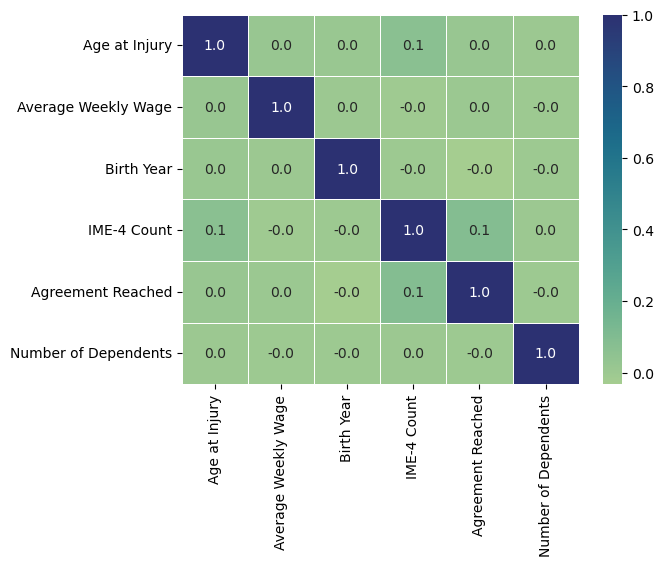

In [26]:
correlation_matrix = numerical_df = df.select_dtypes(include='number').corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", linewidth=.5, cmap="crest")
plt.show()

### <span style="color:salmon"> 3.6 Categorical Variables </span> 

The next step involves cleaning and transforming the categorical data.

**Handling unknown values in categorical variables**

*Modifying `Alternative Dispute Resolution`*

Before making any alterations, we decided to check the 5 cases with `U` in the variable `Alternative Disputer Resolution`.

In [29]:
df[df['Alternative Dispute Resolution'] == 'U'].T

Claim Identifier,5582402,6032724,6034607,6108701,6108690
Accident Date,2018-03-12 00:00:00,2021-11-05 00:00:00,2022-07-06 00:00:00,2022-09-01 00:00:00,2022-08-29 00:00:00
Age at Injury,57,56,52,57,55
Alternative Dispute Resolution,U,U,U,U,U
Assembly Date,2020-10-21 00:00:00,2022-07-11 00:00:00,2022-07-13 00:00:00,2022-10-17 00:00:00,2022-10-17 00:00:00
Attorney/Representative,N,N,Y,N,N
Average Weekly Wage,0.0,0.0,0.0,NaN,0.0
Birth Year,1961,1965,1969,1965,1967
C-2 Date,NaT,NaT,NaT,NaT,NaT
C-3 Date,NaT,NaT,2023-03-09 00:00:00,NaT,NaT
Carrier Name,ELECTRICAL EMPLOYERS,ELECTRICAL EMPLOYERS,ELECTRICAL EMPLOYERS,ELECTRICAL EMPLOYERS,ELECTRICAL EMPLOYERS


Above, we can see that we have no data about the injury itself, so we decided to drop these rows.

In [30]:
# Drop rows where 'Alternative Dispute Resolution' is 'U'
df = df[df['Alternative Dispute Resolution'] != 'U']

In [31]:
top_keywords = (
    df['Carrier Name']
    .str.split(expand=True)              # Split the carrier names into separate words
    .stack()                              # Stack into a single column
    .reset_index(drop=True)              # Reset index to clean up the DataFrame
    .str.replace(r',', '', regex=True)   # Remove commas
    .str.replace(r'\.', '', regex=True)   # Remove periods
    .str.replace(r'\bOF\b', '', regex=True)  # Drop "OF" words
    .str.replace(r'&', '', regex=True)    # Drop "&" symbols 
    .str.replace(r'\bINS\b', 'INSURANCE', regex=True)  # Replace "INS" with "INSURANCE"
    .str.replace(r'\bCO\b', 'COMPANY', regex=True)  
    .str.replace(r'\bCORP\b', 'CORPORATION', regex=True) 
    .str.strip()                         # Remove leading/trailing whitespace
)

# Get top 30 keywords, excluding empty strings
top_15_keywords = top_keywords[top_keywords != ''].value_counts().head(15)

# Display the result
print(top_15_keywords)


INSURANCE      334815
COMPANY        199631
STATE          113187
FUND           112653
INDEMNITY       55998
FIRE            48440
CORPORATION     43821
AMERICAN        34672
CASUALTY        30867
NEW             26469
NATIONAL        24813
ZURICH          22512
AMERICA         22214
INC             21859
POLICE          21652
Name: count, dtype: int64


### <span style="color:yellow"> Create binary variables with carrier name type? </span> 

*Modifying `Gender`*

In the `Gender` column, we replaced the values `U` and `X` with `Unknown`. The value `U` typically indicates "unknown" or unspecified gender, while `X` may signify a non-binary identity. By combining these two values into `Unknown`, we simplify the data, making it easier to analyze and interpret.

In [32]:
# Replace 'U' with 'Unknown'
df['Gender'] = df['Gender'].replace({'U': 'Unknown'})
# Replace 'X' with 'Unknown'
df['Gender'] = df['Gender'].replace({'X': 'Unknown'})

**Encoding**

To use the categorical variables, it is necessary to encode them as most models do not accept non-numerical values.

In [43]:
'''
- One-hot encoding:
- Label encoding:
- Target encoding:
'''

'\n- One-hot encoding:\n- Label encoding:\n- Target encoding:\n'

## <span style="color:salmon"> 4. Other Visualizations </span> 

### <span style="color:yellow"> Add visualizations with cleaned data </span> 

## <span style="color:salmon"> 5. Feature Selection </span> 

### <span style="color:yellow"> Split the dataset, scale and then start feature selection </span> 

#### <span style="color:salmon"> 5.1 Chi-Squared Test  </span> 

In [ ]:
for var in categorical_df.columns:
    TestIndependence(df[var],df['Claim Injury Type'], var)

## <span style="color:salmon"> 6. Export Dataset </span> 

### <span style="color:yellow"> Export clean dataset </span> 